# Class: STATS 507
Professor: Keith, Levin 

Student: Martin, Zanaj, mzanaj@umich.edu

Homework 6

I have not disclosed my code with no additional individual. 

In [72]:
#Question 1
#1. Create a series
import pandas as pd
import numpy as np

#Recycled from program #4 to get primes 
def primes():
    n = 1
    flag=True
    while True:
        n=n+1
        #Check if prime
        for x in range(2,n):
            if n%x!=0:
                continue
            else:
                #not prime
                flag=False
                break
        #yield prime
        if(flag==True):
            yield n
        flag=True

#Generator that yiedls first 10 primes
p = primes()
prime= []
for x in range(10):
    prime.append(next(p))

#The 10 letters 
index= ['a','b', 'c','d', 'e','f','g','h','i','j']

#The series (data, index)
alphaprimes = pd.Series(prime,index = index )

#Test
#print(alphaprimes)


#2.Re-create the Data Frame
#Actual Data
arrays = [['goat', 'goat', 'goat', 'goat', 'bird', 'bird', 'bird', 'bird', 'llama', 'llama', 'llama', 'llama'],
          ['A','A','a','a','A','A','a','a','A','A','a','a'],
          ['A','a','A','a','A','a','A','a','A','a','A','a'],
         ]
#Transform into a list format 
tuples = list(zip(*arrays))

#multiIndex 
index = pd.MultiIndex.from_tuples(tuples, names=['animal', 'parent1','parent2'])

#Score
score=np.array([[1,2,3,4,5,6,7,8,9,10,11,12],
                [2,4,4,6,6,8,8,10,10,12,12,14]])

#Construct Frame
animals= pd.DataFrame(score.transpose(),index= index, columns=['score1','score2'])

#Test
#print(animals)

In [337]:
#Question2
#1. 
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv

#Read as Panda DataFrame
file_name = 'iris.csv'
iris=pd.read_csv(file_name)

#Total Data Points, there are 150 total points
#count = s.count(axis='rows')
count = iris.shape[0]

#DataTypes , (Sepal.Length float64, Sepal.Width float64, Petal.Length, float64Petal.Width, float64Species, object, dtype: object)
data_types= iris.dtypes

#Column Names, there are 5 different columns (['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'])
columns_names= list(iris.columns.values)

#Species of flowers, 3 could use nunique() too same thing
species = len(iris['Species'].unique())

#Test
#print(iris)
#print(count)
#print(data_types)
#print(columns_names)
#print(iris['Species'].unique())

#2. Make correction using 1 indexing (iloc or loc, given in this case we have integers as index we can use either one)
modify_35 = [4.9,3.1,1.5,.2,'setosa']
iris.loc[34] = modify_35
modify_38= [4.9,3.6,1.4,0.1,'setosa']
iris.loc[37] = modify_38

#Test
#print(iris.iloc[34])
#print(iris.iloc[37])
#iris[34:38]

#3. Add new columns
#Petal ratio
iris['Petal.Ratio'] = iris['Petal.Length']/iris['Petal.Width']
#Sepal Ratio
iris['Sepal.Ratio']=iris['Sepal.Length']/iris['Sepal.Width']
#Test
#iris

#4. Save corrected data frame as csv file 
save_file = iris.to_csv('iris_corrected.csv')

#5. Group by  (species the Petal and Sepal) compute mean , median, min, max, std
iris[['Species','Petal.Ratio','Sepal.Ratio']].groupby('Species').agg(['mean','median','min','max', 'std'])


Petal.Ratio                                     Sepal.Ratio  \
                  mean    median       min   max       std        mean   
Species                                                                  
setosa        6.908000  7.000000  2.666667  15.0  2.854545    1.470188   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median       min       max       std  
Species                                             
setosa      1.463063  1.268293  1.956522  0.118750  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

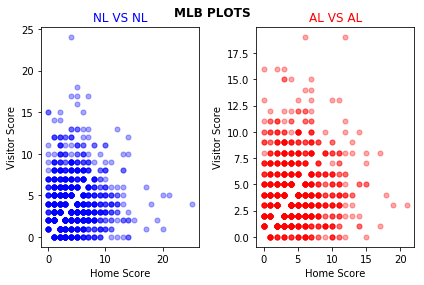

In [3]:
#Question 3
#1. 
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv

#Read file
file_name = './mlb2018/GL2018.TXT'

#There are no column names (header = None)
mlb_df=pd.read_csv(file_name, header = None)

#Get all columns names (0,1,2,3,4,..)
all_columns= list(mlb_df.columns.values)

#Rename columns 10th & 11th (1 indexing)
all_columns[9]= 'v_score'
all_columns[10]= 'h_score'

#Rename columns 5th and 8th  (1 indexing)
all_columns[4]= 'v_league'
all_columns[7]= 'h_league'

#Apply changes
mlb_df.columns = all_columns

#Test
#print(mlb_df)

#2. 
import matplotlib as mp
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

%matplotlib inline

#Get each column
v_league = mlb_df['v_league']
h_league = mlb_df['h_league']

v_score = mlb_df['v_score']
h_score = mlb_df['h_score']

#Create a list NL VS NL, AL VS AL
nl_vs_nl= []
al_vs_al= []

#Find out weather NL VS NL, or AL VS AL 
for x in range(len(v_league)):
    if(v_league[x] == 'NL' and h_league[x] == 'NL'):
        nl_vs_nl.append(x)
    elif(v_league[x] == 'AL' and h_league[x] == 'AL'):
          al_vs_al.append(x)
    else:
        continue
        
#X and Y coordinates
nl_vs_nl_x= []
nl_vs_nl_y= []

al_vs_al_x= []
al_vs_al_y= []


#nl_vs_nl X & Y  
for x in nl_vs_nl:
    nl_vs_nl_x.append(h_score[x])
    nl_vs_nl_y.append(v_score[x])

#al_vs_al X & Y  
for x in al_vs_al:
    al_vs_al_x.append(h_score[x])
    al_vs_al_y.append(v_score[x])

#Graph info, alpha = 0.35 (trial and error)

#Major plot (next to each other)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('MLB PLOTS', fontweight="bold")

#First subplot
ax1.set_title('NL VS NL', color = 'blue')
ax1.plot(nl_vs_nl_x, nl_vs_nl_y,'ob', markersize = 5, alpha= 0.35)
ax1.set_xlabel('Home Score')
ax1.set_ylabel('Visitor Score')

#Second subplot
ax2.set_title('AL VS AL', color = 'red')
ax2.plot(al_vs_al_x, al_vs_al_y, 'or', markersize = 5,  alpha= 0.35)
ax2.set_xlabel('Home Score')
ax2.set_ylabel('Visitor Score')

#Ensure no overlapping 
plt.tight_layout()

#Save File as into a pdf
fname= 'home_vs_away_scores.pdf'
plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',orientation='portrait')


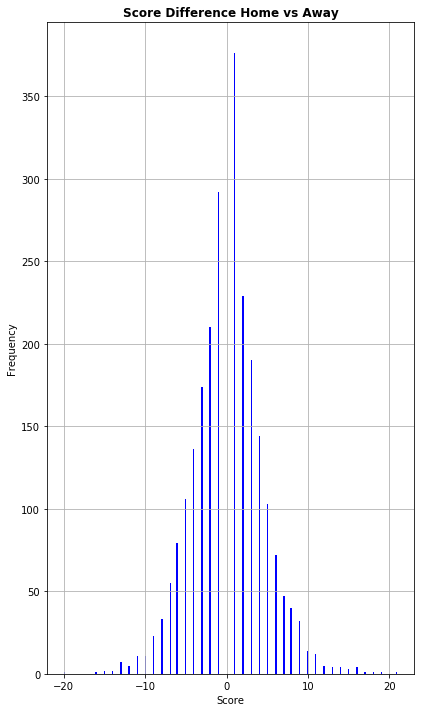

In [4]:
#Question 3
#3. 
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv
import matplotlib as mp
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
%matplotlib inline

#Read file
file_name = './mlb2018/GL2018.TXT'
mlb_df=pd.read_csv(file_name, header = None)
all_columns= list(mlb_df.columns.values)
all_columns[9]= 'v_score'
all_columns[10]= 'h_score'
all_columns[4]= 'v_league'
all_columns[7]= 'h_league'
mlb_df.columns = all_columns

#Add a new column to the current data
mlb_df['score_diff'] = mlb_df['h_score'] - mlb_df['v_score']

#MAKE A HISTOGRAM 
#Data
x= mlb_df['score_diff']

#Set Picture in decent size 
plt.figure(figsize=(6,10))

#Info + legend
plt.title('Score Difference Home vs Away',fontweight="bold" )
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid()

#Bins size
num_bins = int(len(mlb_df['score_diff'])/10)

#Plot
plt.hist(x,bins =num_bins , color = 'blue')
_= plt.tight_layout()

#Test
#print(mlb_df)

In [5]:
#Question 3
#4. 
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv
import matplotlib as mp
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import chisquare
from scipy.stats import skellam
%matplotlib inline

#Read file
file_name = './mlb2018/GL2018.TXT'
mlb_df=pd.read_csv(file_name, header = None)
all_columns= list(mlb_df.columns.values)
all_columns[9]= 'v_score'
all_columns[10]= 'h_score'
all_columns[4]= 'v_league'
all_columns[7]= 'h_league'
mlb_df.columns = all_columns

#Add a new column to the current data
mlb_df['score_diff'] = mlb_df['h_score'] - mlb_df['v_score']


#GET POISSION means FOR HOME SCORE AND FOR VISITOR SCORE
#I am assuming that we are already considering the score already possion distribution  (maybe I'm worng)
#Lambda's 
lambda_home = mlb_df['h_score'].mean()
lambda_visitor = mlb_df['v_score'].mean()

#mlb_df[['h_score']].agg(['mean'])
#print(lambda_home)
#print(lambda_visitor)

#Find skillam distribution  with lambda_home & lambda_visitor
#skellam = skellam(lambda_home, lambda_visitor)
#skellam = skellam.pmf(0,lambda_home, lambda_visitor)
skellam = skellam.cdf(0,lambda_home, lambda_visitor)

#5. 
#Chi Test
chi2stat,chi2pvalue = chisquare(f_obs=mlb_df['score_diff'],f_exp= skellam, ddof=0)
#print(chi2stat,chi2pvalue)

#P value is zero. Hence, reject the null hypothesis. This might not be an appropriate distribution. Perhaps, we could
#as well reject the notion of having an estimation parameter of zero, if we were to redefine it, maybe the Skillam 
#Distribution could perhaps shed light into interesting findings. 


Hello
